In [2]:
from numpy import array
import time
import os
from itertools import product
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.colors import ListedColormap
import pickle
####

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics


from sklearn.ensemble import RandomForestClassifier

#Model Performance Evaluators
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

from joblib import parallel_backend
from joblib import Parallel, delayed


In [3]:
print('loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


mfilename='/shares/kslotkin_share/private/tratnayake/frNAnet/models/rfc_WTvdcr_comb_set1_v1.pkl'
# load the model 
rfc_set1 = pickle.load(open(mfilename, 'rb'))

loading model >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [4]:
print('loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')


dcl_rp_df= pd.read_csv('/shares/kslotkin_share/private/tratnayake/rubyRF/WT_dcr_red/predRF/dcrWT_SRWT_pr_set1_df.txt',header=0,sep='\t')


print('input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
np.shape(dcl_rp_df)



shuf_comb_df=dcl_rp_df.iloc[np.random.permutation(len(dcl_rp_df))]



shuf_comb_df=shuf_comb_df.reset_index(drop=True)

shuf_comb_df.info()


loading data >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
input shape: >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284686 entries, 0 to 1284685
Data columns (total 23 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   seq_id   1284686 non-null  object 
 1   5p       1284686 non-null  int64  
 2   3p       1284686 non-null  int64  
 3   strand   1284686 non-null  int64  
 4   ptype    1284686 non-null  int64  
 5   length   1284686 non-null  int64  
 6   gc_cont  1284686 non-null  float64
 7   AA       1284686 non-null  int64  
 8   AC       1284686 non-null  int64  
 9   AG       1284686 non-null  int64  
 10  AT       1284686 non-null  int64  
 11  CA       1284686 non-null  int64  
 12  CC       1284686 non-null  int64  
 13  CG       1284686 non-null  int64  
 14  CT       1284686 non-null  int64  
 15  GA       1284686 non-null  int64  
 16  GC       1284686 non-null  int64  
 17  GG       1284686 non

In [5]:
ydt=shuf_comb_df['ptype']

xdt=shuf_comb_df.drop(['seq_id','ptype'],axis=1)


In [8]:
with parallel_backend('threading',n_jobs=52 ):

    print('prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>')
    
    y_pred = rfc_set1.predict(xdt)

prediction >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>


In [9]:
from sklearn.metrics import accuracy_score

print('prediction accuracy score : {0:0.4f}'. format(accuracy_score(ydt, y_pred)))



print ("\nClassification report :\n",(classification_report(ydt,y_pred)))


prediction accuracy score : 0.7113

Classification report :
               precision    recall  f1-score   support

           0       0.71      0.79      0.74    664137
           1       0.72      0.63      0.67    583496

    accuracy                           0.71   1247633
   macro avg       0.71      0.71      0.71   1247633
weighted avg       0.71      0.71      0.71   1247633



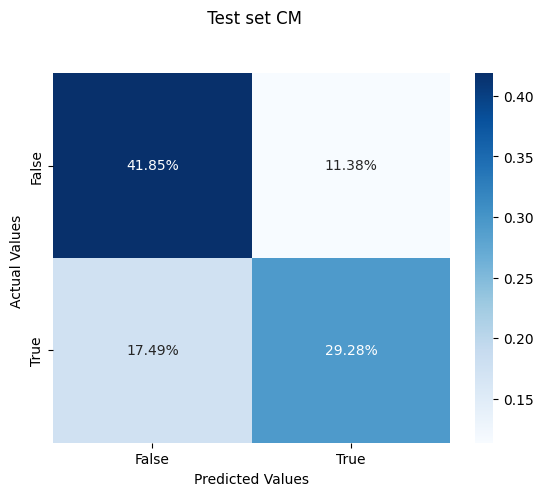

In [11]:
# #####################################  CONFUSION MATRIX for pred set   ########################################################################
fig1=plt.figure()
cm = confusion_matrix(y_true=ydt, y_pred=y_pred)

ax = sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title(' Test set CM\n\n');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])


fig1 = ax.get_figure()

fig1.savefig("RFC_dcrWT_set1_predset1_v1.pdf")